#  Use the dataset from TFRecord files to build and train a model

## Import all the necessary libraries

In [1]:
import os
import glob
from datetime import datetime

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

%matplotlib inline

tf.__version__

'2.0.0'

## Load the `tf.data.Dataset` from TFRecord files

In [2]:
raw_train_dataset = tf.data.TFRecordDataset('images.tfrecord')
raw_train_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

## Parse the dataset

In [ ]:
for raw_train_data in raw_train_dataset.take(-1):    
    example = tf.train.Example()
    example.ParseFromString(raw_train_data.numpy())  
    print(example)

In [4]:
# Create a dictionary describing the features.
image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def parse_tf_example(example_proto):
    # Parse the input tf.Example proto using the dictionary above.
    parsed_example = tf.io.parse_single_example(example_proto, image_feature_description)

    x_train = tf.image.decode_jpeg(parsed_example['image_raw'], channels=3)
    x_train = tf.image.resize(x_train, (416, 416))
    x_train /= 255.

    lebel = parsed_example['label']
    y_train = lebel
    
    return x_train, y_train

train_dataset = raw_train_dataset.map(parse_tf_example)
train_dataset

<MapDataset shapes: ((416, 416, 3), ()), types: (tf.float32, tf.int64)>

### Recover the images from the TFRecord file:

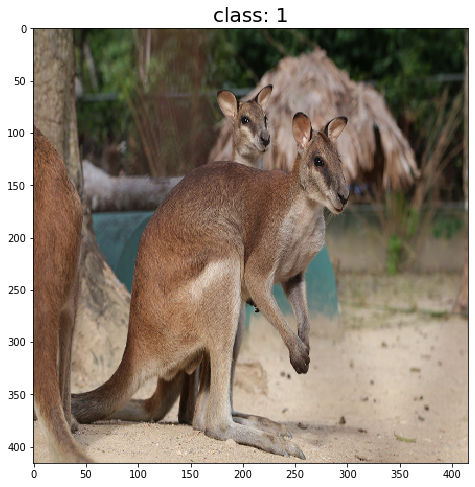

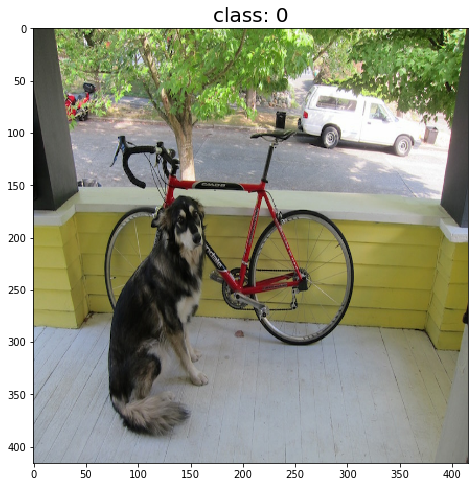

In [5]:
for x_train, y_train in train_dataset:
    f, (ax1) = plt.subplots(1, 1, figsize=(8,8))
    f.subplots_adjust(hspace = .2, wspace = .05)
    
    ax1.imshow(x_train.numpy())
    ax1.set_title('class: {}'.format(y_train), fontsize=20)

## Use the dataset to train a model

### Shuffle and batch the datasets

In [6]:
num_epochs = 10

train_ds = train_dataset.shuffle(buffer_size=10000).batch(2).repeat(num_epochs)
train_ds

<RepeatDataset shapes: ((None, 416, 416, 3), (None,)), types: (tf.float32, tf.int64)>

In [7]:
for batch, (x, y) in enumerate(train_ds):
    print(batch, x.shape, y)

0 (2, 416, 416, 3) tf.Tensor([1 0], shape=(2,), dtype=int64)
1 (2, 416, 416, 3) tf.Tensor([0 1], shape=(2,), dtype=int64)
2 (2, 416, 416, 3) tf.Tensor([1 0], shape=(2,), dtype=int64)
3 (2, 416, 416, 3) tf.Tensor([0 1], shape=(2,), dtype=int64)
4 (2, 416, 416, 3) tf.Tensor([0 1], shape=(2,), dtype=int64)
5 (2, 416, 416, 3) tf.Tensor([0 1], shape=(2,), dtype=int64)
6 (2, 416, 416, 3) tf.Tensor([0 1], shape=(2,), dtype=int64)
7 (2, 416, 416, 3) tf.Tensor([0 1], shape=(2,), dtype=int64)
8 (2, 416, 416, 3) tf.Tensor([0 1], shape=(2,), dtype=int64)
9 (2, 416, 416, 3) tf.Tensor([1 0], shape=(2,), dtype=int64)


### Build and train a model

In [8]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
model.fit(train_ds, epochs=num_epochs)

Epoch 1/10
10/10 [==============================] - 1s 113ms/step - loss: 37.6682 - accuracy: 0.7500
Epoch 2/10
10/10 [==============================] - 0s 29ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 30ms/step - loss: 1.7703e-07 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 25ms/step - loss: 0.000